In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# File and reporter country names

In [2]:
for file in os.listdir('db_downloads'):
    if not file.endswith('.csv'):
        continue
    country_name = file.replace('.csv', '').split('_')
    
    df = pd.read_csv(f'db_downloads/{file}')
    
    if df.shape[0] == 1:
        continue
        
    reporter_name = df['Reporter'].iloc[0].lower()
    
    if reporter_name not in country_name:
        print(reporter_name, 'not in', country_name)
        print('\n')

state of palestine not in ['palestine']


lao people's dem. rep. not in ['lao']


antigua and barbuda not in ['antigua', 'and', 'barbuda']


sri lanka not in ['sri', 'lanka']


brunei darussalam not in ['brunei']


burkina faso not in ['burkina', 'faso']


côte d'ivoire not in ['ivory', 'coast']


cabo verde not in ['cabo', 'verde']


costa rica not in ['costa', 'rica']


bosnia herzegovina not in ['bosnia', 'herzegovina']


united arab emirates not in ['united', 'arab', 'emirates']


rep. of korea not in ['korea']


saint lucia not in ['saint', 'lucia']


usa not in ['united', 'states', '2016', '2018']


dominican rep. not in ['dominican', 'republic']


dem. rep. of the congo not in ['democratic', 'republic', 'of', 'congo']


saint kitts and nevis not in ['saint', 'kitts', 'and', 'nevis']


south africa not in ['south', 'africa']


china, macao sar not in ['macao']


saint vincent and the grenadines not in ['saint', 'vincent', 'and', 'grenadines']


rep. of moldova not in ['moldova']


All file names seem to be attributed to the right reporter (manual check).

# Numbers of records

We want to verify whether there is no weirdly recurring number of records that could indicate a download limit.

In [3]:
nb_records = []

for file in os.listdir('db_downloads'):
    if not file.endswith('.csv'):
        continue
        
    df = pd.read_csv(f'db_downloads/{file}')
    
    if df.shape[0] == 1:
        continue
        
    elif df.shape[0] == 100000:
        # We print the name of the file it contains 100,000 records exactly
        print(file)
        nb_records.append(df.shape[0])
        
    elif df.shape[0] % 1000 == 0:
        # We print the name of the file if its number of records is divisible by 1,000
        print(file)
        nb_records.append(df.shape[0])
    
    else:
        nb_records.append(df.shape[0])

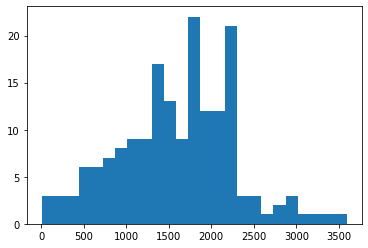

In [4]:
plt.hist(nb_records, bins=25);

# Countries without any data

For a number of reporting countries, in absence of data, the download returns a void `csv` file.  

We output a list of these countries to double-check whether this is due to a temporary issue or to an actual absence of data.

In [5]:
countries_without_data = []

for file in os.listdir('db_downloads'):
    if not file.endswith('.csv'):
        continue
        
    df = pd.read_csv(f'db_downloads/{file}')
    
    if df.shape[0] == 1:
        countries_without_data.append(file)
        
    else:
        continue

In [6]:
textfile = open("countries_without_data.txt", "w")

for country in sorted(countries_without_data):
    textfile.write(country + "\n")
    
textfile.close()

# Counter-checking with total imports

For each combination of reporting country, year and trade flow (either "import" or "re-import"), we verify that the total of all observations corresponds to the total value of trade. The latter is obtained by downloading the data from the UN Comtrade portal for all reporting countries, partner `World` and for the years of interest.

In [7]:
# Loading the totals
total_inward_flows = pd.read_csv('agg_datasets/simplified.csv')

In [8]:
total_inward_flows = total_inward_flows[
    total_inward_flows['Trade Flow'].isin(
        ['Import', 'Re-Import']
    )
].copy()

In [9]:
total_inward_flows.head()

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
0,H4,2018,2018,2018,0,0,1,Import,4,Afghanistan,...,0.0,NaN,NaN,NaN,NaN,NaN,7406590324,NaN,NaN,4
3,H4,2019,2019,2019,0,0,1,Import,4,Afghanistan,...,0.0,NaN,NaN,NaN,NaN,NaN,8568013876,NaN,NaN,4
6,H2,2016,2016,2016,0,0,1,Import,4,Afghanistan,...,NaN,NaN,NaN,NaN,NaN,NaN,6534140413,NaN,NaN,0
8,H2,2017,2017,2017,0,0,1,Import,4,Afghanistan,...,0.0,NaN,NaN,NaN,NaN,NaN,7792600111,NaN,NaN,4
10,H5,2017,2017,2017,0,0,1,Import,8,Albania,...,0.0,NaN,NaN,NaN,0.0,NaN,5293901931,NaN,NaN,4


In [10]:
total_inward_flows['KEY'] = total_inward_flows['Reporter ISO'] + total_inward_flows['Partner ISO']\
    + total_inward_flows['Year'].astype(str) + total_inward_flows['Trade Flow']

mapping = total_inward_flows.groupby('KEY').count()['Trade Value (US$)'].to_dict()
total_inward_flows['NB_RECORDS'] = total_inward_flows['KEY'].map(mapping)

total_inward_flows = total_inward_flows[
    np.logical_or(
        total_inward_flows['NB_RECORDS'] == 1,
        np.logical_and(
            total_inward_flows['NB_RECORDS'] > 1,
            total_inward_flows['Classification'] == 'H5'
        )
    )
].copy()

In [11]:
total_inward_flows = total_inward_flows[
    ['Year', 'Trade Flow', 'Reporter', 'Reporter ISO', 'Trade Value (US$)']
].reset_index(drop=True)

In [12]:
total_inward_flows.shape

(982, 5)

In [13]:
total_inward_flows.sort_values(by=['Reporter ISO', 'Year']).head(20)

,Year,Trade Flow,Reporter,Reporter ISO,Trade Value (US$)
648,2016,Import,Aruba,ABW,1117122531
649,2017,Import,Aruba,ABW,1194930129
650,2018,Import,Aruba,ABW,1255956119
651,2019,Import,Aruba,ABW,1313806452
652,2020,Import,Aruba,ABW,939368007
2,2016,Import,Afghanistan,AFG,6534140413
3,2017,Import,Afghanistan,AFG,7792600111
0,2018,Import,Afghanistan,AFG,7406590324
1,2019,Import,Afghanistan,AFG,8568013876
19,2016,Import,Angola,AGO,14347710497


In [14]:
# Loading the data broken down by country pair, split across many csv files
dataframes = []

for file in os.listdir('db_downloads'):
    if not file.endswith('.csv'):
        continue
        
    else:
        df = pd.read_csv(f'db_downloads/{file}')
        
        if df.shape[0] == 1:
            continue
        
        else:
            dataframes.append(df)

In [15]:
data = pd.concat(dataframes, axis=0)

In [16]:
# We add a partner country code for the observations with "Areas, nes" as partner
data['Partner ISO'] = data.apply(
    lambda row: {'Areas, nes': 'AREAS_NES'}.get(row['Partner'], row['Partner ISO']),
    axis=1
)

In [17]:
data.columns

Index(['Classification', 'Year', 'Period', 'Period Desc.', 'Aggregate Level',
       'Is Leaf Code', 'Trade Flow Code', 'Trade Flow', 'Reporter Code',
       'Reporter', 'Reporter ISO', 'Partner Code', 'Partner', 'Partner ISO',
       '2nd Partner Code', '2nd Partner', '2nd Partner ISO',
       'Customs Proc. Code', 'Customs', 'Mode of Transport Code',
       'Mode of Transport', 'Commodity Code', 'Commodity', 'Qty Unit Code',
       'Qty Unit', 'Qty', 'Alt Qty Unit Code', 'Alt Qty Unit', 'Alt Qty',
       'Netweight (kg)', 'Gross weight (kg)', 'Trade Value (US$)',
       'CIF Trade Value (US$)', 'FOB Trade Value (US$)', 'Flag'],
      dtype='object')

In [18]:
data = data.drop(columns=['2nd Partner', 'Mode of Transport Code', 'Customs Proc. Code'])

In [19]:
data = data[data['Trade Flow'].isin(['Import', 'Re-Import'])].copy()
data = data[data['Partner'] != 'World'].copy()

In [20]:
data['KEY'] = data['Reporter ISO'] + data['Partner ISO'] + data['Year'].astype(str) + data['Trade Flow']

mapping = data.groupby('KEY').count()['Trade Value (US$)'].to_dict()
data['NB_RECORDS'] = data['KEY'].map(mapping)

data = data[
    np.logical_or(
        data['NB_RECORDS'] == 1,
        np.logical_and(
            data['NB_RECORDS'] > 1,
            data['Classification'] == 'H5'
        )
    )
].copy()

In [21]:
data.shape

(137753, 34)

In [22]:
grouped_df = data.groupby(
    ['Year', 'Trade Flow', 'Reporter ISO']
).sum()[
    'Trade Value (US$)'
].reset_index().sort_values(
    by=['Reporter ISO', 'Year']
)

In [23]:
grouped_df.shape

(987, 4)

In [24]:
grouped_df.head(20)

,Year,Trade Flow,Reporter ISO,Trade Value (US$)
0,2016,Import,ABW,1117076352
212,2017,Import,ABW,1194930123
425,2018,Import,ABW,1255956115
634,2019,Import,ABW,1313806445
825,2020,Import,ABW,939368002
1,2016,Import,AFG,6529076402
213,2017,Import,AFG,7785377289
426,2018,Import,AFG,7401465470
635,2019,Import,AFG,8565014391
2,2016,Import,AGO,14326493648


In [25]:
# 3 rows with missing ISO codes for "Other Asia, nes" as a reporter
total_inward_flows.isnull().sum()

Year                 0
Trade Flow           0
Reporter             0
Reporter ISO         0
Trade Value (US$)    0
dtype: int64

In [26]:
merged_df = total_inward_flows.dropna().merge(   # NB: we eliminate the rows with missing ISO codes for Other Asia
    grouped_df,
    on=['Year', 'Trade Flow', 'Reporter ISO'],
    how='left'
)

In [27]:
merged_df[merged_df['Trade Value (US$)_y'].isnull()]

,Year,Trade Flow,Reporter,Reporter ISO,Trade Value (US$)_x,Trade Value (US$)_y


In [28]:
temp = merged_df.dropna().copy()

In [29]:
temp.head()

,Year,Trade Flow,Reporter,Reporter ISO,Trade Value (US$)_x,Trade Value (US$)_y
0,2018,Import,Afghanistan,AFG,7406590324,7401465470
1,2019,Import,Afghanistan,AFG,8568013876,8565014391
2,2016,Import,Afghanistan,AFG,6534140413,6529076402
3,2017,Import,Afghanistan,AFG,7792600111,7785377289
4,2017,Import,Albania,ALB,5293901931,5285511683


In [30]:
temp['DIFF'] = np.abs(temp['Trade Value (US$)_x'] - temp['Trade Value (US$)_y']).values

In [31]:
temp['%_DIFF'] = temp['DIFF'] / temp['Trade Value (US$)_x'] * 100

In [32]:
temp.sort_values(by='%_DIFF', ascending=False).head(15)

,Year,Trade Flow,Reporter,Reporter ISO,Trade Value (US$)_x,Trade Value (US$)_y,DIFF,%_DIFF
838,2020,Re-Import,Spain,ESP,1829040013,1506551574,322488439,17.631568
697,2019,Import,Panama,PAN,21484233253,18349764904,3134468349,14.589622
22,2016,Import,Antigua and Barbuda,ATG,490525305,419129210,71396095,14.555028
840,2019,Re-Import,Spain,ESP,2675001277,2287458460,387542817,14.487575
696,2018,Import,Panama,PAN,22974913294,19701943382,3272969912,14.245842
695,2017,Import,Panama,PAN,21934113569,18976822425,2957291144,13.482611
836,2016,Re-Import,Spain,ESP,2498363425,2175868327,322495098,12.908254
842,2018,Re-Import,Spain,ESP,2255811063,1970158664,285652399,12.662958
698,2020,Import,Panama,PAN,14716521688,13022499657,1694022031,11.511022
431,2019,Import,Israel,ISR,76578559000,67819969000,8758590000,11.437392


With these manipulations, the match is rather good (maximum discrepany of around 18%) between the bilaterally broken down data and the totals downloaded directly from the UN Comtrade portal. However, for some reporting countries and especially for re-imports, excluding "Areas, nes" (e.g., by not attributing it a partner country code in the code above) may yield to large discrepancies.

# Data selection process

## Testing the Python file

In [33]:
from data_selection import get_selected_data

In [34]:
%%time
data = get_selected_data()

CPU times: user 3.04 s, sys: 603 ms, total: 3.65 s
Wall time: 3.91 s


In [35]:
data.head()

,Year,Trade Flow,Reporter,Reporter ISO,Partner,Partner ISO,Trade Value (US$)
0,2019,Import,Ethiopia,ETH,Afghanistan,AFG,23983
1,2019,Import,Ethiopia,ETH,Albania,ALB,218934
2,2019,Import,Ethiopia,ETH,Algeria,DZA,468931
3,2019,Import,Ethiopia,ETH,American Samoa,ASM,567242
4,2019,Import,Ethiopia,ETH,Andorra,AND,2443933


## Partial preprocessing

What follows should be operated in the `destination_based_sales` package, where I prepare trade statistics.

In [36]:
# Eliminating certain reporting entities in which we are not interested
data = data[~data['Reporter'].isin(['EU-28', 'ASEAN', 'Other Asia, nes'])].copy()

In [37]:
# Eliminating certain partner entities in which we are not interested
data = data[
    ~data['Partner'].isin(
        [
            'Other Asia, nes', 'Special Categories', 'Other Africa, nes', 'Areas, nes', 
            'Other Europe, nes', 'Bunkers', 'LAIA, nes', 'Oceania, nes', 
            'North America and Central America, nes', 'Free Zones'
        ]
    )
].copy()

In [38]:
data = data.drop(columns=['Reporter', 'Partner'])

In [39]:
data_reshaped = data.pivot(
    index=['Year', 'Reporter ISO', 'Partner ISO'],
    columns='Trade Flow',
    values='Trade Value (US$)'
).reset_index()

In [40]:
data_reshaped['Re-Import'] = data_reshaped['Re-Import'].fillna(0)

In [41]:
data_reshaped['NET_IMPORTS'] = data_reshaped['Import'] - data_reshaped['Re-Import']

In [42]:
data_reshaped = data_reshaped.drop(columns=['Import', 'Re-Import'])

In [43]:
data_reshaped = data_reshaped.rename(
    columns={
        'Year': 'YEAR',
        'Reporter ISO': 'OTHER_COUNTRY_CODE',
        'Partner ISO': 'AFFILIATE_COUNTRY_CODE',
        'NET_IMPORTS': 'MERCHANDISE_EXPORTS'
    }
)

In [44]:
data_reshaped.head()

Trade Flow,YEAR,OTHER_COUNTRY_CODE,AFFILIATE_COUNTRY_CODE,MERCHANDISE_EXPORTS
0,2016,ABW,BEL,476502.0
1,2016,ABW,BHS,901364.0
2,2016,ABW,BRA,14347015.0
3,2016,ABW,CHE,688192.0
4,2016,ABW,CHN,17022453.0


## Identifying a headquarter country bias?

In [45]:
# BEA data

In [46]:
from destination_based_sales.bea import BEADataPreprocessor

In [47]:
processor = BEADataPreprocessor(year=2016)

In [48]:
bea_data = processor.load_final_data()

In [49]:
bea_data = bea_data[['CODE', 'TOTAL_OTHER_COUNTRY', 'TOTAL_US']].copy()

In [50]:
bea_data['US_WEIGHT'] = bea_data['TOTAL_US'] / (bea_data['TOTAL_OTHER_COUNTRY'] + bea_data['TOTAL_US']) * 100

In [51]:
# Comtrade data

In [52]:
comtrade_data = data_reshaped[data_reshaped['YEAR'] == 2016].drop(columns='YEAR')

In [53]:
comtrade_data

Trade Flow,OTHER_COUNTRY_CODE,AFFILIATE_COUNTRY_CODE,MERCHANDISE_EXPORTS
0,ABW,BEL,4.765020e+05
1,ABW,BHS,9.013640e+05
2,ABW,BRA,1.434702e+07
3,ABW,CHE,6.881920e+05
4,ABW,CHN,1.702245e+07
...,...,...,...
27619,ZWE,VNM,1.330285e+06
27620,ZWE,WLF,1.320000e+02
27621,ZWE,YEM,9.200000e+01
27622,ZWE,ZAF,2.177861e+09


In [54]:
comtrade_data_grouped = comtrade_data.groupby('AFFILIATE_COUNTRY_CODE').sum().reset_index()

In [55]:
def get_exports_to_the_US(country_code):
    df = comtrade_data[
        np.logical_and(
            comtrade_data['AFFILIATE_COUNTRY_CODE'] == country_code,
            comtrade_data['OTHER_COUNTRY_CODE'] == 'USA'
        )
    ].copy()
    
    if df.empty:
        return 0
    
    else:
        return df['MERCHANDISE_EXPORTS'].iloc[0]

In [56]:
comtrade_data_grouped['US_MERCHANDISE_EXPORTS'] = comtrade_data_grouped['AFFILIATE_COUNTRY_CODE'].map(
    get_exports_to_the_US
)

In [57]:
comtrade_data_grouped['US_WEIGHT_EXPORTS'] = (
    comtrade_data_grouped['US_MERCHANDISE_EXPORTS'] / comtrade_data_grouped['MERCHANDISE_EXPORTS']
) * 100

In [58]:
# Merging the two datasets

In [59]:
bea_data[['CODE', 'US_WEIGHT']].merge(
    comtrade_data_grouped[['AFFILIATE_COUNTRY_CODE', 'US_WEIGHT_EXPORTS']],
    how='inner',
    left_on='CODE', right_on='AFFILIATE_COUNTRY_CODE'
)

,CODE,US_WEIGHT,AFFILIATE_COUNTRY_CODE,US_WEIGHT_EXPORTS
0,CAN,84.016308,CAN,67.469044
1,AUT,22.730730,AUT,7.746451
2,BEL,16.704569,BEL,5.770212
3,CZE,6.493701,CZE,3.090049
4,DNK,16.648970,DNK,9.686980
5,FIN,44.418825,FIN,7.579000
6,FRA,13.417396,FRA,9.477241
7,DEU,15.120352,DEU,9.461992
8,GRC,8.436725,GRC,5.247229
9,HUN,15.417853,HUN,5.454689
